Actividad 7: Redes Neuronales Artificiales

Erik Santiago Garcia Chavez 2132013 IMTC

Alan Ramirez Bravo 2132003 IMTC

Hora: N4

In [12]:
# 1. Cargar librerías
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [14]:
# 2. Cargar y verificar datos
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Verificación inicial
print("Forma original de los datos:")
print("Train images:", train_images.shape)
print("Train labels:", train_labels.shape)
print("\nEjemplo de etiquetas:", train_labels[:5])

Forma original de los datos:
Train images: (60000, 28, 28)
Train labels: (60000,)

Ejemplo de etiquetas: [5 0 4 1 9]


In [15]:
# 3. Preprocesamiento garantizado
# Normalización
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# One-hot encoding EXPLÍCITO
num_classes = 10
train_labels = to_categorical(train_labels, num_classes=num_classes)
test_labels = to_categorical(test_labels, num_classes=num_classes)

# Verificación crítica
print("\nDespués del preprocesamiento:")
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Primera etiqueta one-hot:", train_labels[0])

# Verificación adicional
assert train_labels.shape == (60000, 10), f"Error: Forma incorrecta de labels {train_labels.shape}"
assert test_labels.shape == (10000, 10), f"Error: Forma incorrecta de test labels {test_labels.shape}"


Después del preprocesamiento:
Train images shape: (60000, 28, 28)
Train labels shape: (60000, 10)
Primera etiqueta one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [18]:
# 4. Modelo y entrenamiento
# Definición del modelo
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compilación
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Entrenamiento
history = model.fit(train_images, train_labels,
                   epochs=10,
                   batch_size=32,
                   validation_split=0.2)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8661 - loss: 0.4646 - val_accuracy: 0.9548 - val_loss: 0.1523
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9648 - loss: 0.1188 - val_accuracy: 0.9674 - val_loss: 0.1055
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9768 - loss: 0.0769 - val_accuracy: 0.9689 - val_loss: 0.1031
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9819 - loss: 0.0574 - val_accuracy: 0.9742 - val_loss: 0.0896
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9878 - loss: 0.0410 - val_accuracy: 0.9748 - val_loss: 0.0897
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9900 - loss: 0.0333 - val_accuracy: 0.9736 - val_loss: 0.0972
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9902 - loss: 0.0285 - val_accuracy: 0.9737 - val_loss: 0.1023
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9929 - loss: 0.021


Exactitud en datos de prueba: 0.9757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


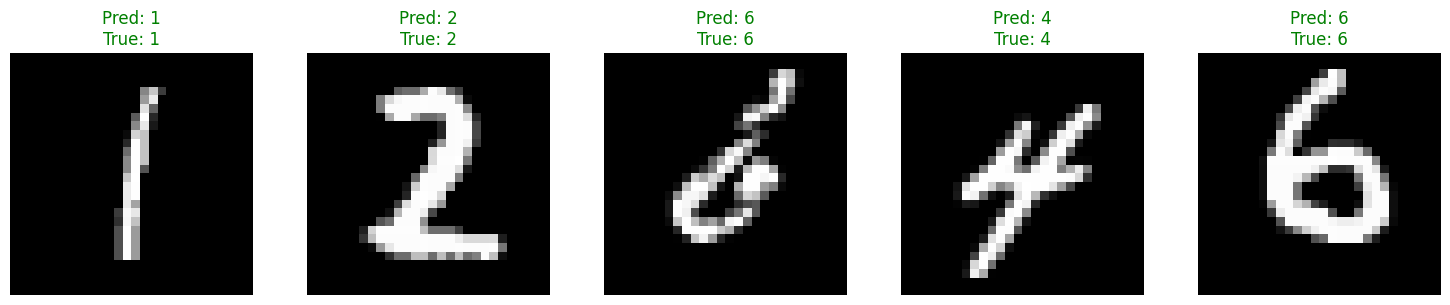

In [19]:
# 5. Prueba del modelo
"""
Evaluamos el modelo con datos de prueba y realizamos 5 predicciones aleatorias.
"""
# Evaluar el modelo con los datos de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f"\nExactitud en datos de prueba: {test_acc:.4f}")

# Realizar 5 predicciones aleatorias
sample_indices = np.random.choice(len(test_images), 5)
sample_images = test_images[sample_indices]
sample_labels = test_labels[sample_indices]

predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(sample_labels, axis=1)

# Mostrar las predicciones
plt.figure(figsize=(15, 3))
for i, (img, pred, true) in enumerate(zip(sample_images, predicted_labels, true_labels)):
    plt.subplot(1, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Pred: {pred}\nTrue: {true}', color='green' if pred == true else 'red')
    plt.axis('off')
plt.tight_layout()
plt.show()